In [1]:
import re
import pandas as pd


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline


In [3]:
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder


from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import train_test_split


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [9]:
sms = pd.read_csv('SMSSpamCollection.csv', sep='\t', error_bad_lines = False, encoding='latin-1', header=0, names=["label", "message"])



In [10]:
sms.groupby('label').describe()


message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
sms['msg_length'] = sms.message.apply(lambda x: len(x))

In [12]:
sms.head(20)

,label,message,msg_length
0,ham,Ok lar... Joking wif u oni...,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
2,ham,U dun say so early hor... U c already then say...,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,148
5,ham,Even my brother is not like to speak with me. ...,77
6,ham,As per your request 'Melle Melle (Oru Minnamin...,160
7,spam,WINNER!! As a valued network customer you have...,158
8,spam,Had your mobile 11 months or more? U R entitle...,154
9,ham,I'm gonna be home soon and i don't want to tal...,109


In [13]:
sms['message']

0                           Ok lar... Joking wif u oni...
1       Free entry in 2 a wkly comp to win FA Cup fina...
2       U dun say so early hor... U c already then say...
3       Nah I don't think he goes to usf, he lives aro...
4       FreeMsg Hey there darling it's been 3 week's n...
5       Even my brother is not like to speak with me. ...
6       As per your request 'Melle Melle (Oru Minnamin...
7       WINNER!! As a valued network customer you have...
8       Had your mobile 11 months or more? U R entitle...
9       I'm gonna be home soon and i don't want to tal...
10      SIX chances to win CASH! From 100 to 20,000 po...
11      URGENT! You have won a 1 week FREE membership ...
12      I've been searching for the right words to tha...
13                    I HAVE A DATE ON SUNDAY WITH WILL!!
14      XXXMobileMovieClub: To use your credit, click ...
15                             Oh k...i'm watching here:)
16      Eh u remember how 2 spell his name... Yes i di...
17      Fine i

In [14]:
sms['label'].value_counts()

ham     4824
spam     747
Name: label, dtype: int64

In [15]:
sms['label'].isnull().sum()

0

In [16]:
sms.dtypes

label         object
message       object
msg_length     int64
dtype: object

In [17]:
sms['message']= [ msg.lower() for msg in sms['message']]

In [18]:
sms.head()

,label,message,msg_length
0,ham,ok lar... joking wif u oni...,29
1,spam,free entry in 2 a wkly comp to win fa cup fina...,155
2,ham,u dun say so early hor... u c already then say...,49
3,ham,"nah i don't think he goes to usf, he lives aro...",61
4,spam,freemsg hey there darling it's been 3 week's n...,148


# Contractions needs to be expanded

In [24]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}   

In [19]:
text_dict = sms.reset_index().to_dict(orient='list')

In [20]:
text_dict['label']

['ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 's

In [22]:
def cont_msg_expand(text):
    for word in text.split():
        if word.lower() in contractions:
            text = word.replace(word, contractions[word.lower()])
    
    return text

# Removing Contractions

In [25]:


text_dict['clean_msg'] = [cont_msg_expand(re.sub('’', "'", msg)) for msg in text_dict['message']]


In [145]:
text_dict['clean_msg']

['ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 'do not',
 'i would',
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea â£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had your mobile 11 months or more? u r entitled to update to the latest colour mobiles with camera for free! call the mobile update co free on 08002986030',
 'i have',
 'six chances to win cash! from 100 to 20,000 pounds txt> csh11 and send to 87575. cost 150p/day, 6days, 16+ tsandcs apply reply hl 4 info',
 'urgent

# Text cleaning

In [26]:
def text_cleaning(text):

    
    #cleaned_text = emoji_pattern.sub(r' ', text)
    #Replace non ascii / not word and newline
    cleaned_text = re.sub('\\W|\n',' ',text)
     
    #Remove html markup
    cleaned_text = re.sub("<.*?>", ' ', cleaned_text)

    #Remove extra spaces and under score from the text
    cleaned_text = re.sub("(\s+)|_",' ',cleaned_text)
    return cleaned_text


In [27]:
text_dict['clean_msg'] = [text_cleaning(msg) for msg in text_dict['clean_msg']]

In [28]:
text_dict['clean_msg'] 

['ok lar joking wif u oni ',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say ',
 'do not',
 'i would',
 'even my brother is not like to speak with me they treat me like aids patent ',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea â 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only ',
 'had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030',
 'i have',
 'six chances to win cash from 100 to 20 000 pounds txt csh11 and send to 87575 cost 150p day 6days 16 tsandcs apply reply hl 4 info',
 'urgent you have won a 1 week free mem

In [29]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuation(text):
    new_text=''.join([char for char in text if char not in string.punctuation])
    return new_text


In [31]:
text_dict['clean_msg'] = [remove_punctuation(msg) for msg in text_dict['clean_msg']]

In [32]:
text_dict['clean_msg'] 

['ok lar joking wif u oni ',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say ',
 'do not',
 'i would',
 'even my brother is not like to speak with me they treat me like aids patent ',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea â 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only ',
 'had your mobile 11 months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on 08002986030',
 'i have',
 'six chances to win cash from 100 to 20 000 pounds txt csh11 and send to 87575 cost 150p day 6days 16 tsandcs apply reply hl 4 info',
 'urgent you have won a 1 week free mem

In [33]:
import spacy
stopword = spacy.lang.en.stop_words.STOP_WORDS


In [34]:
def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
        
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    lemma = [t.lemma_ for t in filtered_tokens]
    return lemma


In [35]:

text_dict['clean_text_lemmatized'] = []


for idx,text in enumerate(text_dict['clean_msg']):

    doc = nlp(text)
    #print(f"processing {idx} document")
        
    words_lemmatized = tokenize_and_lemmatize(doc)
  #ocab_lemmatized.extend(words_lemmatized)
    text_dict['clean_text_lemmatized'].append(words_lemmatized)
    
       


In [36]:

text_dict['clean_text_lemmatized'] 

[['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  't',
  'c',
  's',
  'apply',
  '08452810075over18',
  's'],
 ['u', 'dun', 'early', 'hor', 'u', 'c'],
 [],
 [],
 ['brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'value',
  'network',
  'customer',
  'select',
  'receivea',
  'prize',
  'reward',
  'claim',
  'claim',
  'code',
  'kl341',
  'valid',
  'hour'],
 ['mobile',
  'month',
  'u',
  'r',
  'entitle',
  'update',
  'late',
  'colour',
  'mobile',
  'camera',
  'free',
  'mobile',
  'update',
  'co',
  'free'],
 [],
 ['chance',
  'win',
  'cash',
  'pound',
  'txt',
  'csh11',
  'send',
  'cost',
  '1

In [37]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string
text_dict['clean_text_lemmatized'] = [' '.join(text) for text in text_dict['clean_text_lemmatized']]

In [38]:
text_dict['clean_text_lemmatized']

['ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts 21st text fa receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun early hor u c',
 '',
 '',
 'brother like speak treat like aids patent',
 'request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner value network customer select receivea prize reward claim claim code kl341 valid hour',
 'mobile month u r entitle update late colour mobile camera free mobile update co free',
 '',
 'chance win cash pound txt csh11 send cost 150p day 6days tsandcs apply reply hl info',
 'urgent win week free membership prize jackpot txt word claim t c www dbuk net lccltd pobox 4403ldnw1a7rw18',
 '',
 'date sunday',
 'xxxmobilemovieclub use credit click wap link txt message click http wap xxxmobilemovieclub com n qjkgighjjgcbl',
 'oh k m watching',
 'eh u remember spell yes v naughty v wet',
 'fine thatâ s way u feel thatâ s way gota b',
 'england v mace

In [39]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(text_dict['clean_text_lemmatized'])
corpus[:5]


['ok', 'lar', 'joking', 'wif', 'u']

In [40]:
#find most common word

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common


{'u': 1023,
 'ur': 353,
 's': 307,
 'not': 293,
 'come': 267,
 'free': 261,
 'go': 237,
 'send': 235,
 'day': 235,
 'good': 234}

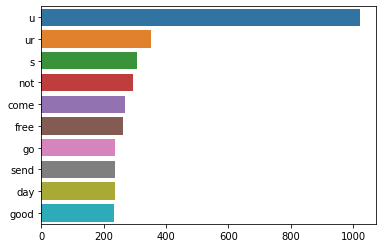

In [41]:
sns.barplot(x=list(most_common.values()),y=list(most_common.keys()))


In [42]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform()

print(tfidf_matrix.shape)

(5571, 64369)


In [44]:
X_train,X_test,y_train,y_test = train_test_split( text_dict['clean_text_lemmatized'],text_dict['label'],test_size=.2)


In [ ]:
# Now convert the text into numeric numbers

In [45]:
# Extending stop words list
stop_words = stopwords.words('english')

# Adding more stop words to existing stopwords list
# stop_words.extend(['aa','aah','aaniye','abj','ag'])
#the stop words will not be part of tfidf matrix.
Tfidf_vect = TfidfVectorizer(stop_words=stop_words, max_features=5000)

#max_featrues can be reduced for saving computational computation. 
Tfidf_vect.fit(text_dict['clean_text_lemmatized'])


train_X_Tfidf =  Tfidf_vect.transform(X_train)
test_X_Tfidf = Tfidf_vect.transform(X_test)
#print(train_X_Tfidf)

In [48]:
from sklearn import model_selection, naive_bayes, svm

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,y_train)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", accuracy_score(y_train, pred_train)*100)
print("Naive Bayes Accuracy Score on Validation set -> ", accuracy_score(y_test, pred_test)*100)


rec = recall_score(y_test, pred_test, pos_label='spam')

prec = precision_score(y_test, pred_test, pos_label='spam')

print("Recall Score on Validation set:", rec)

print("Precision Score on Validation set:", prec)

Naive Bayes Accuracy Score on Train set ->  97.73339317773788
Naive Bayes Accuracy Score on Validation set ->  96.95067264573991
Recall Score on Validation set: 0.7806451612903226
Precision Score on Validation set: 1.0


# Build a logistic Regression model

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 

# Generating model with default parameters using the fit method. 
logreg.fit(train_X_Tfidf, y_train)
train_pred = logreg.predict(train_X_Tfidf)
test_pred = logreg.predict(test_X_Tfidf)

In [68]:
print("Logistic Regression Accuracy Score on Train set -> ", accuracy_score(y_train, train_pred)*100)
print("Logistic Regression Accuracy Score on Validation set -> ", accuracy_score(y_test, test_pred)*100)


rec = recall_score(y_test, test_pred, pos_label='spam')

prec = precision_score(y_test, test_pred, pos_label='spam')

print("Recall Score on Validation set:", rec)

print("Precision Score on Validation set:", prec)

Logistic Regression Accuracy Score on Train set ->  96.97037701974865
Logistic Regression Accuracy Score on Validation set ->  95.51569506726457
Recall Score on Validation set: 0.6838709677419355
Precision Score on Validation set: 0.9906542056074766


In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
F1 = f1_score(y_train, train_pred, pos_label='spam') 


In [71]:
F1

0.8720379146919431

# Build a RandomForestClassifier model

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(train_X_Tfidf,y_train)

# predict the labels on train dataset
pred_train1 = rfc.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = rfc.predict(test_X_Tfidf)

In [75]:
# Use accuracy_score function to get the accuracy
print("RFC Accuracy Score on Train set -> ", accuracy_score(y_train, pred_train1)*100)
print("RFC Accuracy Score on Validation set -> ",accuracy_score(y_test, pred_test1)*100)

rec1 = recall_score(y_test, pred_test1, pos_label='spam')

prec1 = precision_score(y_test, pred_test1, pos_label='spam')

print("Recall Score on Validation set:", rec1)

print("Precision Score on Validation set:", prec1)

RFC Accuracy Score on Train set ->  99.41651705565529
RFC Accuracy Score on Validation set ->  97.66816143497758
Recall Score on Validation set: 0.832258064516129
Precision Score on Validation set: 1.0


In [ ]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common


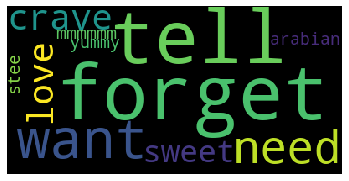

In [169]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text_dict['clean_text_lemmatized'][40])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()